# **Data Cleaning Tutorial: Titanic Dataset**

<img src="LinkedIn Images/Titanic.png" alt="Logo" style="float:left; width:500px; height:250px;">

## **Introduction**

The Titanic dataset is a go-to classic for data enthusiasts. It’s packed with passenger details like age, gender, ticket class, and whether they survived the tragic sinking. You can easily get your hands on it through Python libraries or platforms like Kaggle.

Before we dive into any analysis or modeling, cleaning the dataset is crucial. Think of it as tidying up a messy room before you can focus. In this tutorial, we’ll tackle the core steps of data cleaning - dealing with duplicates, handling missing values, detecting and managing outliers, and converting data types. 

By the end, our data will be prepped and polished using my go-to process. In the first two cleaning steps, we’ll fully apply these methods and remove data for practice. For the last two steps, I’ll guide you through the process, but we’ll apply the changes only to a few items - leaving the rest for you to experiment with on your own. Remember, your approach may vary depending on your project goals, so deciding when and why to remove or modify data is key. Data cleaning is not a one-size-fits-all process, and being thoughtful about how and when to clean data is crucial for ensuring that your analysis remains valid and reliable.


### **Titanic Dataset Dictionary:**

* `survived` | Description: Survival status (0 = No, 1 = Yes) | Type: Integer (binary)
* `pclass` | Description: Passenger class (1st = 1, 2nd = 2, 3rd = 3) | Type: Integer (ordinal)
* `sex` | Description: Gender of the passenger (male, female) | Type: String (categorical)
* `age` | Description: Age of the passenger (in years) | Type: Float (continuous) | Note: Missing  values present
* `sibsp` | Description: Number of siblings or spouses aboard | Type: Integer (discrete)
* `parch` | Description: Number of parents or children aboard | Type: Integer (discrete)
* `fare` | Description: Fare paid by the passenger | Type: Float (continuous)
* `embarked` | Description: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) | Type: String (categorical)
* `class` | Description: Passenger class ('First', 'Second', 'Third') | Type: String (categorical)
* `who` | Description: Gender categorization (man, woman, child) | Type: String (categorical)
* `adult_male` | Description: Whether the passenger is an adult male (True, False) | Type: Boolean (binary)
* `deck` | Description: Deck level of the cabin (A to G, T = unknown) | Type: String (categorical) | Note: Many missing values
* `embark_town` | Description: Full name of embarkation town (Cherbourg, Queenstown, Southampton) | Type: String (categorical)
* `alive` | Description: Survival status (yes or no) | Type: String (categorical)
* `alone` | Description: Whether the passenger traveled alone (True, False) | Type: Boolean (binary)

### **Libraries Used**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Loading the Data**

We’ll start by loading the dataset into a DataFrame.

In [14]:
data = sns.load_dataset("titanic")

### **Understanding the Data**

Before diving into cleaning, it's crucial to explore the data and get familiar with its structure. Your first step in any analysis should always be understanding what’s inside the dataset—its content, distribution, and data types.

***Dataset Preview:*** A quick way to inspect a portion of your dataset. It’s perfect for confirming successful data loading, checking the layout, or verifying column headers.

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


***Dataset Overview:*** This gives you a snapshot of the dataset, showing basic info like data types, non-null counts, and memory usage. It also helps you spot missing data in each column, giving you a heads-up on areas that might need cleaning.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


***Statistical Overview:*** Provides a quick summary of the numerical columns, including key statistics like mean, median, and standard deviation, to help you understand the distribution and spread of your data.

In [6]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Dataset Size:*** Shows the total number of elements (individual cells) in the dataset, calculated by multiplying the number of rows and columns.

In [7]:
data.size

13365

## **Step 1: Dealing with Duplicates**

Let's kick things off by making sure your data is clean and duplicate-free, so you can be confident that every data point adds unique value to your analysis!

Throughout this tutorial, you’ll notice I frequently use f-strings. They’re a powerful tool that allows me to clearly communicate outputs in a way that’s easy to understand, even for those unfamiliar with the code. By embedding variables directly into the text, f-strings make the results more readable and give a deeper insight into what’s happening behind the scenes. You'll see them in action often, helping make the outputs more intuitive and engaging.

***Create a Copy:*** Before we do anything, it's always a good idea to create a copy of your dataset or assign the cleaned version to a new variable. In this tutorial, we’ll be making a copy. This way, you keep your original data safe and avoid any accidental overwrites.

In [15]:
data_cleaned = data.copy()

***Check for Duplicates:*** Identify any duplicate rows that may exist in the dataset.  I recommend using the following code, which provides the total number of duplicates and displays a DataFrame containing only the duplicated rows for further inspection.

In [16]:
duplicate_count = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

duplicates = data_cleaned[data_cleaned.duplicated(keep=False)]
duplicates_sorted = duplicates.sort_values(by=duplicates.columns.tolist())
print(f"Dataframe Rows: {duplicates_sorted.shape[0]}")
print(f"Dataframe Columns : {duplicates_sorted.shape[1]}")

duplicates_sorted.head()

Number of duplicate rows: 107
Dataframe Rows: 160
Dataframe Columns : 15


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
64,0,1,male,NaN,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
295,0,1,male,NaN,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
144,0,2,male,18.0,0,0,11.5000,S,Second,man,True,NaN,Southampton,no,True
757,0,2,male,18.0,0,0,11.5000,S,Second,man,True,NaN,Southampton,no,True
658,0,2,male,23.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


***Insights:*** We've identified 107 duplicate rows, which could arise from data entry errors or coincidental matches. You might notice that the DataFrame produced shows 160 rows of duplicates. This discrepancy occurs because there can be more than one duplicate of the same row. To ensure a clean dataset, it’s crucial to carefully review the duplicates and determine whether they should be removed or kept, depending on the context. This step is important because maintaining unique and valid entries ensures the accuracy of your analysis.

In this case, while it's possible the duplicates represent different individuals, it's more likely they are repeated entries. Since we don’t have additional distinguishing details (like names or ticket numbers) to verify otherwise, we’ll proceed by removing the duplicates and checking the total data loss afterward.

In [17]:
# Calculate the initial size of the dataset
initial_size = data_cleaned.size

# Drop duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Calculate the dataset size after dropping duplicates
final_size = data_cleaned.size

# Calculate the proportion of data removed
proportion_removed = ((initial_size - final_size) / initial_size) * 100

# Print the proportion of data removed
print(f"Proportion of Data Removed: {proportion_removed:.2f}%")

Proportion of Data Removed: 12.01%


<br>

## **Step 2: Handling Missing Data**

No more gaps! Together, we'll tackle missing data to make sure your dataset is complete and ready for accurate analysis. In this section, we’ll explore different strategies - because sometimes, missing data is too valuable to just toss out. For example, when predicting survival rates, missing age data could be filled in using the mean or median, depending on the distribution, to keep its importance in the analysis. Let’s find the best approach for your dataset!

***Identifying Missing Values:*** Let’s check how much data is missing from each column.  While you can always use the basic code below, I prefer creating a DataFrame that also shows the percentage of missing data - it gives a clearer picture of how much is missing and where.

In [18]:
# Calculate missing data
missing_data = data_cleaned.isnull().sum()

In [19]:
# Calculate percentage of missing data
missing_percentage = (missing_data / len(data_cleaned)) * 100

# Create a DataFrame with both counts and percentage of missing data
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Row Percentage': missing_percentage
})
missing_df

,Missing Values,Row Percentage
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,106,13.520408
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.255102
class,0,0.000000
who,0,0.000000


***Visualizing Missing Data (Optional):*** A heatmap is a powerful way to visually represent missing data, making it easier to spot gaps across your dataset at a glance.

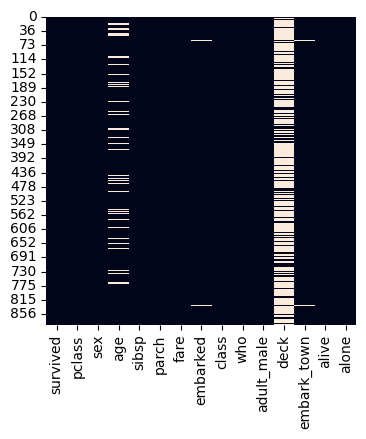

In [109]:
plt.figure(figsize=(4, 4))
sns.heatmap(data_cleaned.isnull(), cbar=False);

***Assessing Data Loss (Optional):*** Another useful option is to assess whether dropping rows or columns would result in the least data loss. The code below helps you determine which approach is more efficient for preserving your data.

In [20]:
total_elements = data_cleaned.size
total_rows = data_cleaned.shape[0]
total_columns = data_cleaned.shape[1]

In [21]:
null_columns = (missing_data > 0).sum()
column_removal_proportion = (total_rows * null_columns) / total_elements * 100

null_rows = data_cleaned.isnull().any(axis=1).sum()
row_removal_proportion = (null_rows * total_columns) / total_elements * 100

print(f"Percentage of data lost by removing columns with missing values: {column_removal_proportion:.2f}%")
print(f"Percentage of data lost by removing rows with missing values: {row_removal_proportion:.2f}%")

Percentage of data lost by removing columns with missing values: 26.67%
Percentage of data lost by removing rows with missing values: 76.91%


<br>

***Dealing with Missing Values:*** Managing missing data is a crucial part of data cleaning, and it can be handled by either dropping the missing values or imputing them. The best approach depends on the dataset and its context. For example, the `'embarked'` and `'embark_town'` columns each have only two missing values, so dropping those rows might be sufficient. On the other hand, the `'deck'` column is missing 74.23% of its data, making it more practical to drop the entire column due to the large gaps. 

***Here are our options -***

***Dropping All Missing Rows:*** This option allows you to drop any row that contains missing values. However, in this tutorial, we won’t be using this approach to drop all missing rows.

In [ ]:
# With inplace
data_cleaned.dropna(inplace=True)

# Without inplace
data_cleaned = data_cleaned.dropna()

When you use `inplace=True` in pandas methods like `.drop()` or `.dropna()`, it applies the changes directly to the original DataFrame, so there's no need to assign it back to a variable. Without `inplace=True`, the method creates a modified copy, so you’d need to save it to a new variable or overwrite the original DataFrame to retain the changes.

***Dropping Specific Rows:*** If you want to drop rows that have missing values in a specific column (like the `'embarked'` or `'embark_town'` columns), you can use the `.dropna()` method with the `subset` parameter. Here’s how you can target and drop only those rows.

In [22]:
# Drop rows where the 'emarked' and 'embark_town' columns have missing values
data_cleaned = data_cleaned.dropna(subset=['embarked', 'embark_town'])

***Dropping Specific Columns:***  To remove specific columns by their names, you can use the `.drop()` method, specifying the column names you want to drop.

In [23]:
# Drop specific columns, e.g., dropping the 'deck'column
data_cleaned = data_cleaned.drop(columns=['deck'])

***Imputing Missing Values:*** For numerical columns like `'age'`, you can fill in missing data using the mean, ensuring the overall distribution of the data remains intact.  Another option is using the forward fill method. This argument specifies that the missing values should be filled with the last known (non-null) value that appeared before them in the DataFrame.  Here's how to do both.

In [34]:
# Fill missing data in 'age' column with mean values
data_cleaned['age'] = data_cleaned['age'].fillna(data_cleaned['age'].mean())

# Foward fill missing values
data_filled = data_cleaned.fillna(method='ffill')

***Confirm Changes:*** Finally, it’s important to recheck the data to confirm that the changes were successfully applied. In this example, I’ve followed through with the earlier recommendations by dropping all rows with missing values in the `'embarked'` and `'embark_town'` columns, removing the `'deck'` column entirely, and filling the missing values in the `'age'` column.

Keep in mind, these steps were taken purely for this example, and the approach you take will depend on your project goals.

In [25]:
before = data.size
after = data_cleaned.size
difference = before - after
print(f"Proportion of data removed: {round((difference / before) *100, 2)}%")

data_cleaned.isnull().sum()

Proportion of data removed: 18.08%


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

***Evaluating Missing Data: How Much is Too Much?***
*These are general guidelines to help you evaluate the impact of data loss on your analysis and decide how to handle missing values effectively.*

* Less than 5% loss: Minimal impact, acceptable in most cases. Dropping rows or columns is usually fine.
* 5-10% loss: Moderately acceptable. Check for patterns in missing data. Random missing data is less concerning, but systematic loss could introduce bias.
* Above 10% loss: Proceed with caution. Consider using imputation techniques (e.g., mean, median) to fill missing values, as dropping data could distort results.
* Above 20% loss: Typically unacceptable. High data loss reduces representativeness and risks invalidating the dataset.

***Note:*** The goal of this tutorial is to guide you through the data cleaning process step by step. From here on, I’ll provide the code for each method, but I won’t apply it to every part of the dataset. This is your opportunity to follow along, apply the steps in your own environment, and make adjustments to suit your specific data and project goals.

<br>

## **Step 3: Detecting and Managing Outliers**

Outliers can skew your analysis and impact the accuracy of models, so addressing them is essential. In this tutorial, we'll explore several techniques to detect and manage outliers, including boxplots, the interquartile range (IQR), and the z-score method (using the Empirical Rule). These tools will help you spot and decide how to handle extreme values in your dataset.

***Visualize Outliers:*** In this section, we’ll dive deeper into our Titanic dataset by extending the basic descriptive statistics with boxplots and histograms to visualize the distribution of numerical columns. The goal is to better understand the data’s shape, spot potential outliers, and detect any skewness or clusters. This visual inspection will help ensure the dataset is thoroughly assessed and prepared for further analysis, leading to more accurate results. As you follow along, feel free to apply these steps to your own dataset and tweak the methods where necessary to suit your specific needs.

As a reminder, here are the descriptive stats - 

In [116]:
data_cleaned.describe()

,survived,pclass,age,sibsp,parch,fare
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,0.410486,2.246803,29.809793,0.524297,0.416880,34.595913
std,0.492237,0.853828,13.689920,0.987138,0.837728,52.176458
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.809793,0.000000,0.000000,15.875000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


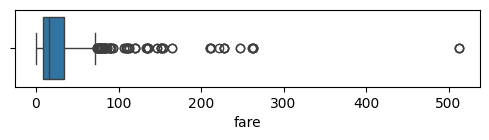

In [26]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=data_cleaned['fare']);

***Tip:*** When setting bin ranges for a histogram, start by reviewing the descriptive statistics to find the maximum value for the targeted column. Set the upper limit 1 unit higher than this maximum to ensure all data points are captured. Next, decide on the number of bins - best practice suggests using between 10 to 20 bins, striking a balance between too much and too little granularity.

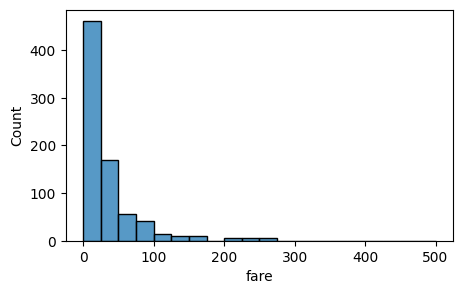

In [27]:
plt.figure(figsize=(5,3))
sns.histplot(data_cleaned['fare'], bins=range(0,513,25));

***Insight:*** The boxplot reveals a significant number of outliers in the `'fare'` column, with most fares clustered between 0-50, and a few much higher values causing a right-skew in the data. The histogram confirms this skewed distribution, with fares dropping off sharply after 50, indicating that higher fares were rare. Together, these plots reveal a skewed fare distribution with numerous outliers, which could influence statistical analysis if not handled appropriately. This makes sense as the majority of passengers on the Titanic were likely traveling in third class (steerage) or second class, where ticket prices were more affordable, leading to a concentration of fares in the lower range.

***Interquartile Range (IQR):*** Next, let's look at applying the IQR to display the number of outliers and the proportion of dataset these outliers make up. In this code, we are using a loop to iterate over multiple numerical columns and calculate the Interquartile Range (IQR) for each. By using the standard threshold of Q3 + 1.5 * IQR, we identify outliers that exceed this threshold. The loop then stores the number of outliers and their proportion relative to the total number of rows in a results DataFrame, allowing us to efficiently display outliers across all specified columns.

In [28]:
# Using a loop to identify outliers and determine the proportion
column_list = ['survived',
              'pclass',
              'age',
              'sibsp',
              'parch',
              'fare'
              ]

results = []

for column in column_list:
    q1 = data_cleaned[column].quantile(0.25)
    q3 = data_cleaned[column].quantile(0.75)
    iqr = q3 - q1
      
    # Standard threshold using Q3 + 1.5*IQR
    standard_threshold = q3 + 1.5 * iqr
    standard_outliers = (data_cleaned[column] > standard_threshold).sum()
    proportion = (standard_outliers / len(data_cleaned)) * 100
    
    results.append([
        column, 
        standard_outliers, 
        f"{proportion:.2f}%"
    ])

# Create a DataFrame to display the results
outlier_df = pd.DataFrame(results, columns=[
    'Column', 
    'Number of Outliers', 
    'Proportion'
])

outlier_df

,Column,Number of Outliers,Proportion
0,survived,0,0.00%
1,pclass,0,0.00%
2,age,32,4.09%
3,sibsp,39,4.99%
4,parch,15,1.92%
5,fare,100,12.79%


It’s important to note that there are several options for handling outliers, such as capping (Winsorizing), transforming the data, analyzing outliers separately, or imputing values. For this tutorial, we’ll focus on removing outliers. If you want to target a specific column and remove rows with outliers, here’s how you can do it. For example, let’s focus on the `'parch'` column, which has 15 outliers, leading to a 1.92% data loss.

In [33]:
# Define lower and upper bounds to identify outliers
q1 = data_cleaned['parch'].quantile(0.25)
q3 = data_cleaned['parch'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers by keeping only the rows within the IQR bounds
outliers_removed = data_cleaned[(data_cleaned['parch'] >= lower_bound) & (data_cleaned['parch'] <= upper_bound)]

# Check the proportion of rows removed
proportion_removed = ((len(data_cleaned) - len(outliers_removed)) / len(data_cleaned)) * 100
print(f"Proportion Removed: {round(proportion_removed, 2)}%\n")

Proportion Removed: 1.92%



***Z-Score and the Emperical Rule:*** Now let's look into applying the Z-score. The Z-score method is a statistical approach for detecting outliers in a dataset. It measures how many standard deviations a data point is from the mean. Outliers typically have high or low Z-scores, indicating that they deviate significantly from the average.

The Empirical Rule (also known as the 68-95-99.7 rule) complements this by explaining how data is distributed in a normal distribution:

* About 68% of data falls within 1 standard deviation of the mean.
* About 95% falls within 2 standard deviations.
* About 99.7% falls within 3 standard deviations.

Data points with Z-scores outside ±3 are often considered outliers because they are more than three standard deviations away from the mean.

***Note:*** This method assumes that the data follows a normal distribution. If the data is skewed or not normally distributed, consider using other methods, like the IQR approach, for more reliable outlier detection.

To apply these statistical methods, we’ll tap into one of Python’s most powerful libraries: `SciPy`.

In [121]:
from scipy import stats

Next, let's use a histogram to visualize the distribution of the `'age'` column and check if the data follows a bell-shaped, normal distribution. This will give us a quick visual cue about the shape of the data and whether the Z-score method is appropriate for detecting outliers.

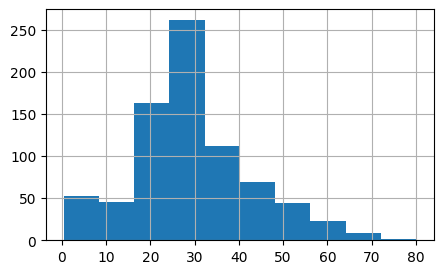

In [122]:
plt.figure(figsize=(5,3))
data_cleaned['age'].hist();

***Insight:*** This distribution is approximately normal, but it is slightly right-skewed. Most of the ages cluster between 20 and 40, forming a bell-shaped curve, but there are some extended tails particularly on the higher end, where fewer passengers are older. While it’s not a perfect bell curve, the distribution is close enough to normal to apply the Z-score method for demonstration purposes. However, be mindful of its limitations due to the skew.

Now, we’ll calculate the mean and standard deviation, which will help us define the boundaries for 1, 2, and 3 standard deviations.

In [123]:
mean = np.mean(data_cleaned['age'])
std_dev = np.std(data_cleaned['age'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

Mean: 29.809792899408286
Standard Deviation: 13.68116366940738


In [124]:
# 1 standard deviation limits
lower_limit_1 = mean - std_dev
upper_limit_1 = mean + std_dev

# 2 standard deviation limits
lower_limit_2 = mean - 2 * std_dev
upper_limit_2 = mean + 2 * std_dev

# 3 standard deviation limits
lower_limit_3 = mean - 3 * std_dev
upper_limit_3 = mean + 3 * std_dev

Next, let’s figure out what percentage of our data falls within these limits.

In [125]:
within_1_std = ((data_cleaned['age'] >= lower_limit_1) & (data_cleaned['age'] <= upper_limit_1)).mean()
within_2_std = ((data_cleaned['age'] >= lower_limit_2) & (data_cleaned['age'] <= upper_limit_2)).mean()
within_3_std = ((data_cleaned['age'] >= lower_limit_3) & (data_cleaned['age'] <= upper_limit_3)).mean()

print(f"{round(within_1_std * 100, 2)}% of data falls within 1 standard deviation.")
print(f"{round(within_2_std * 100, 2)}% of data falls within 2 standard deviations.")
print(f"{round(within_3_std * 100, 2)}% of data falls within 3 standard deviations.")

71.87% of data falls within 1 standard deviation.
92.97% of data falls within 2 standard deviations.
99.49% of data falls within 3 standard deviations.


***Insight:*** The results indicate that the `'age'` data in our Titanic dataset follows the Empirical Rule quite closely, with 71.87% of values within 1 standard deviation, 92.97% within 2, and 99.49% within 3 standard deviations. This suggests the data is approximately normally distributed, making the Z-score method appropriate for outlier detection. Although there may be slight skewness, the close alignment with the Empirical Rule indicates that most of the data falls within the expected range, allowing us to confidently use standard statistical techniques for further analysis.

Now, let’s calculate the Z-scores and inspect the data using the `.head()` function.

In [126]:
data_cleaned['z_score'] = stats.zscore(data_cleaned['age'], ddof=1)
sample_df = data_cleaned[['age', 'z_score']]
sample_df.head()

,age,z_score
0,22.0,-0.570478
1,38.0,0.598266
2,26.0,-0.278292
3,35.0,0.379126
4,35.0,0.379126


This code will identify any data points beyond 3 standard deviations from the mean.

In [127]:
sample_df[(sample_df['z_score'] > 3) | (sample_df['z_score'] < -3)]

,age,z_score
96,71.0,3.008798
493,71.0,3.008798
630,80.0,3.666216
851,74.0,3.227938


***Result:*** After conducting the Z-score test, we identified four outliers with Z-scores above 3, indicating that these ages (71, 80, and 74) are more than three standard deviations away from the mean. This confirms that these values are statistically unusual in the dataset and may require further investigation. Depending on the context, these outliers could be kept for analysis or addressed if they skew results in future modeling.

For demonstration purposes, to remove the rows with a z-score greater than 3 or less than -3, you can use the following code - 

In [128]:
outliers_removed = data_cleaned[(data_cleaned['z_score'] <= 3) & (data_cleaned['z_score'] >= -3)]

# Check the proportion of rows removed
proportion_removed = ((len(data_cleaned) - len(outliers_removed)) / len(data_cleaned)) * 100
print(f"Proportion Removed: {round(proportion_removed, 2)}%\n")

Proportion Removed: 0.51%



<br>

## **Step 4: Correcting Data Types**

Let’s double-check those data types to avoid any errors down the road and make sure everything’s in the right format for smooth analysis. Ensuring that each column has the correct data type is essential for smooth analysis and accurate calculations. Incorrect data types can cause issues when performing operations, visualizations, or feeding data into machine learning models.

***Identifying Incorrect Data Types:*** First, review the data types of each column in the dataset. This will help you identify any columns that need to be converted to a more appropriate type.

In [129]:
data_cleaned.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
z_score         float64
dtype: object

Here, you can spot any discrepancies - such as numerical values stored as strings, or categorical columns that are listed as objects instead of category types.

***Converting Data Types:*** Let’s take the `'embarked'` column as an example. This column represents passengers' embarkation points and should be treated as categorical data. By default, it's stored as an object (string), but it can be converted to the more efficient category data type, which saves memory and ensures correct operations for categorical variables.

In [130]:
data_cleaned['embarked'] = data_cleaned['embarked'].astype('category')

This simple conversion helps with both memory efficiency and model performance, as many machine learning models require categorical variables to be in the correct format before encoding or analysis.

One of the most common issues you might encounter is dates being stored as strings. While this dataset does not contain dates, for future reference here's a simple code snippet for converting date strings to datetime objects.

In [ ]:
# Example of converting a date string column to datetime
data_cleaned['date_column'] = pd.to_datetime(data_cleaned['date_column'], errors='coerce')

This code will convert the values in the date_column to datetime format, making them easier to work with for analysis and modeling.

<br>

## **Summary of Data Cleaning Steps:**

In this tutorial, we’ve focused on the essential steps to clean the Titanic dataset, covering key techniques such as dealing with duplicates, handling missing data, detecting and managing outliers, and correcting data types. These methods form the backbone of preparing your data for further analysis or machine learning.

**Next Steps:** Once you've cleaned your dataset, it’s time to put it to work! You can proceed to exploratory data analysis (EDA), conduct feature selection, or start building your machine learning models. A great next step would be to create a simple logistic regression model to predict passenger survival, or you can continue refining the dataset with additional feature engineering for greater accuracy.

Feel free to try these methods on your own dataset to see what improvements you can achieve. I hope this tutorial has been helpful in demonstrating how to approach data cleaning efficiently.

Now, go clean some data and unleash the power of your models!

<img src="LinkedIn Images/Titanic_2.png" alt="Logo" style="float:left; width:500px; height:250px;">